# Tutorial de Pytorch 3:  Regresión lineal en PyTorch

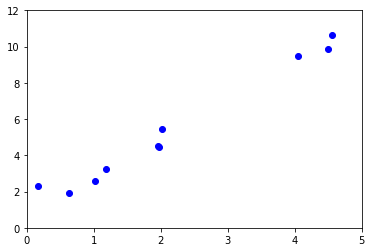

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch

mu, sigma = 0, 0.5 # mean and standard deviation
noise = np.random.normal(mu, sigma, 10)

X = np.random.rand(10)*5
Y = 2*X + 1 + noise
 
plt.axis([0, 5, 0, 12])
plt.plot(X,Y,'bo')
plt.show()


In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X = torch.from_numpy(X).float().to(device)
Y = torch.from_numpy(Y).float().to(device)

m = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

> Hay que distinguir entre los tensores creados para almacenar **datos** y los tensores creados para almacenar **variables** (pesos o parámetros). Para los primeros no necesitaremos calcular sus **gradientes**, para los segundos, sí.

In [16]:
optimizer = torch.optim.SGD([m, b], lr=0.001)

# Defines a MSE loss function
loss_fn = torch.nn.MSELoss(reduction='sum')

for _ in range(1000):

    Y_ = m * X + b
    
    # loss = ((Y - Y_)**2).sum()
    loss = loss_fn(Y, Y_)
    loss.backward()
    
    # No more manual update!
    # with torch.no_grad():
    #    m -= lr * m.grad
    #    b -= lr * b.grad
        
    optimizer.step()
        
    # m.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    

In [17]:
print(m.data.cpu().numpy())
print(b.data.cpu().numpy())

[2.0442646]
[0.94666547]


## Creando un modelo

In [18]:
class ManualLinearRegression(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
        self.m = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        

    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.m * x
    
    
torch.manual_seed(42)


# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)

# We can also inspect its parameters using its state_dict
print(model.state_dict())

lr = 0.01
n_epochs = 1000


loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=lr)


for epoch in range(n_epochs):

    # What is this?!?
    model.train()

    # No more manual prediction!
    # yhat = a + b * x_tensor
    Y_ = model(X)

    loss = loss_fn(Y, Y_)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()

print(model.state_dict())

OrderedDict([('m', tensor([0.3367], device='cuda:0')), ('b', tensor([0.1288], device='cuda:0'))])
OrderedDict([('m', tensor([2.0443], device='cuda:0')), ('b', tensor([0.9465], device='cuda:0'))])


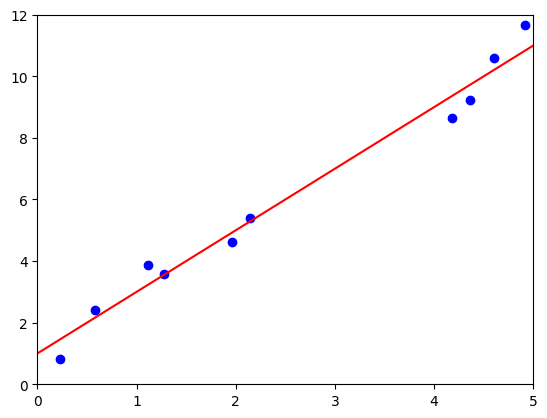

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

mu, sigma = 0, 0.5  # media y desviación estándar
noise = np.random.normal(mu, sigma, 10)

X = np.random.rand(10) * 5
Y = 2 * X + 1 + noise

# Crear valores para la línea
x_line = np.linspace(0, 5, 100)  # 100 puntos entre 0 y 5
y_line = 2 * x_line + 1  # Calcula los valores de y usando la fórmula de la recta

# Configurar los límites del eje
plt.axis([0, 5, 0, 12])

# Dibujar los puntos
plt.plot(X, Y, 'bo')

# Superponer la recta
plt.plot(x_line, y_line, 'r-')  # 'r-' crea una línea roja continua

# Mostrar el gráfico
plt.show()
